# TSP + QAOA - improvements

In the previous part we have implemented an algorithm for solving TSP, we implemented the constraints for this problem, but the results were still not very convincing.

In this tutorial you will learn the following:

- How to improve your QAOA algorithm
- How to make sure that the improvements are real

## Imports

In [1]:
from scripts.forest_tsp_solver_naive import ForestTSPSolverNaive
import numpy as np
from scripts import utilities
from scripts import analysis
from scripts import plots
import matplotlib.pyplot as plt

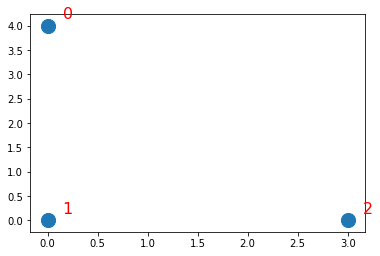

In [2]:
cities = np.array([[0, 4],[0, 0],[3, 0]])
distance_matrix = utilities.get_distance_matrix(cities)
plots.plot_cities(cities)
plt.show()

## Parameters

One of the most obvious and universal ways of improving the performance of an algorithm is changing it parameters. Some algorithms have very few parameters and some have a lot of them.
We covered the parameters of QAOA in the second notebook, so if you don't remember what they are, you can come back there.

From all these parameters, there are three that we care about most for now:
`steps`, `xtol` and `ftol`.

`steps` specifies how many times we apply cost and driver operators. Higher value of `steps` should give better results, but also increase the size of our circuit and hence - runtime.

`xtol` and `ftol` are the parameters of the classical optimizer (in our case it's Nelder-Mead algorithm) we use to find the optimal values of `betas` and `gammas`. They say how small the changes should be so that we can say that our optimization converged. Generally - the smaller, the better results we should get but again, it will take more time. 

If you are interested, you can read more about Nelder-Mead method in the [scipy docs](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html) or [wiki](https://en.wikipedia.org/wiki/Nelder–Mead_method).

For the sake of simplicity we will assume that xtol and ftol always have the same values. We will call this parameter `tol`.

Now that we know what we are doing, please experiment with the values to find those for which we get reasonable results (defaults are `steps=1` and `xtol=ftol=10e-2`)

In [12]:
steps = 1
tol = 10e-2
tsp_solver = ForestTSPSolverNaive(distance_matrix, steps=steps, xtol=tol, ftol=tol, use_constraints=True)
solution, naive_distribution = tsp_solver.solve_tsp()
print("Solution:", solution)
print("Naive distribution:", naive_distribution)

                     models will be ineffective
Solution: [0, 1, 2, 1, 2, 1, 2]
Naive distribution: {(0, 2, 0, 2, 2): 34, (1, 2, 2, 0, 1): 12, (1, 2, 0, 2): 53, (0, 2, 1, 0): 60, (1, 1, 2, 1): 49, (1, 2, 0): 165, (0, 0, 2, 1, 2): 4, (0, 2, 1, 2, 1, 2): 18, (2, 0, 2, 0, 1): 8, (1, 0, 1, 2): 229, (0, 2, 1): 47, (1, 0, 2): 107, (1,): 37, (0, 1, 1, 1): 26, (0, 1, 2): 278, (0, 2, 0, 2): 38, (2, 0, 1, 0, 2): 24, (2, 0, 2): 99, (0, 1): 121, (0, 1, 2, 0, 1, 0, 1, 2): 57, (0, 2, 0, 1, 2, 0, 2): 34, (1, 0, 1): 63, (0, 2): 203, (0, 1, 2, 0, 1, 2, 0): 62, (1, 2, 0, 1): 62, (1, 0, 1, 0, 1): 12, (1, 2, 1, 1): 34, (0, 0): 31, (0, 1, 2, 1, 1, 2): 45, (0, 1, 0, 2, 2): 28, (1, 0, 1, 2, 2): 79, (1, 1, 0, 1, 2): 21, (0, 1, 1, 0): 49, (0, 1, 2, 2, 1, 2): 14, (0, 0, 1, 0): 34, (2, 0, 2, 0, 1, 2): 35, (0, 2, 0, 1): 78, (0, 2, 2, 0, 1): 6, (2, 0, 1): 44, (2, 0, 1, 0, 1, 2): 9, (0, 1, 2, 1, 2): 103, (0, 1, 2, 0): 116, (0, 0, 0): 83, (1, 0, 0, 1, 2): 55, (1, 1, 2, 0): 33, (0, 2, 2, 0, 2): 23, (0, 0, 0, 1, 2): 7

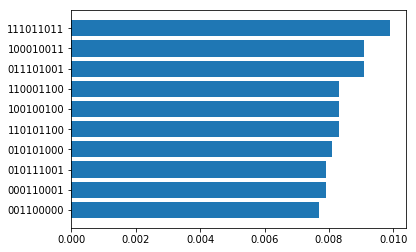

In [13]:
%matplotlib inline
from scripts import plots

states_with_probs = []
for state in tsp_solver.sampling_results:
    states_with_probs.append([''.join(map(str,state)), tsp_solver.sampling_results[state]/10000])
states_with_probs = sorted(states_with_probs,key=lambda x: -x[1])
plots.plot_state_histogram(states_with_probs[:10][::-1])

## Are the improvements really significant?

One problem that we face here is that every time we get different result. And one time it might be a good solution, but the next time it's really crappy.
To deal with this we need to run it multiple times to get some reasonable statistics.

So I have a task for you.
Write a funtion, which will do the following:
    1. Run QAOA multiple times (let's say 10)
    2. Specify the parameters of QAOA
    3. For each run save the following results to a file:
        - time of calculations
        - total probability of all valid solutions
        - cost of the best solution (if valid)
        - probability of the best solution
        - values of the parameters
        - optimal cost

Then we will analyze this data to determine what is the best set of parameters.

This is the format of the file we want:

`steps,tol,time,valid_prob,best_prob,best_valid,best_cost,optimal_cost`

Below there are a couple of functions stubs to help you start:

In [ ]:
def analyze_singe_QAOA_run(distance_matrix, steps, tol, filename):
    # Open proper file
    # Run ForestTSPSolverNaive
    # Calculate all the variables you need (time, probabilities, costs, etc.)
    pass

In [ ]:
def get_probability_of_valid_solutions(sampling_results):
    pass

In [ ]:
def check_if_solution_is_valid(solution):
    pass

In [ ]:
def calculate_cost_of_solution(solution):
    pass

If you get stuck, you can check out `analysis.py` for my implementation.

Now that you have all these functions, let's run it for given set of parameters and see how well does it perform.

In [ ]:
# %%capture 
filename = "results.csv"
# cities = utilities.create_cities(3)
for i in range(50):
    for steps in [1, 2, 3]:
        for tol in [10e-2, 10e-3, 10e-4]:
            print(i, steps, tol)
            distance_matrix = utilities.get_distance_matrix(cities)
            analysis.analyze_singe_QAOA_run(distance_matrix, steps, tol, filename)    

I know these calculations might take a long time, so if you don't want to wait, for the next step feel free to use the data I provided in `results_notebook_04.csv`.

### Some tips on running experiments

Since you need a lot of repetitions and calculations might take a long time, there are some tips how to make it go smoother:

- personally, I prefer running such calculations from the terminal, not notebook. It's easier for me to run several processes then.
- check how many processes you can run in parallel, so they don't steal resources from each other. If your code is using a single thread it usually depends on the number of cores you have.
- use a different filename every time you run the code. Why? Because you can accidentally erase your results if you don't change the filename. How? You can manually change the name of the file every time - but at some point you will forget to do so. I usually add a timestamp to the filename.
- if the execution of your code may stop in the middle (e.g. because you need internet connection) or you need as much data as you can, you can use random set of parameters every time you run it. In our case, instead of writing: `for steps in [1,2,3]` you can write: `while True: steps = random.choice([1,2,3])`. This will make your program run as long as it can (e.g. all night or until crash) and after enough repetitions you will get roughly the same number of results for each parameter set.

## Analyzing results

Now, that we have gathered the measurements, we can analyze them to see which set of parameters gives us reasonable results in reasonable time.

In [4]:
import pandas as pd
filename = "results_notebook_04.csv"
results = pd.read_csv(filename)

In [ ]:
for steps in results.steps.unique():
    for tol in results.tol.unique():
        subset = results[results.steps==steps]
        subset = subset[subset.tol==tol]
        count = len(subset)
        time = subset.time.mean()
        best_sol_valid_prob = subset.best_valid.sum() / len(subset)
        valid_sol_perc = subset.valid_prob.mean() * 100
        best_sol_prob = subset.best_prob.mean()
        print("steps:", steps, "tol:", tol, "count:", count)
        print("Probability of best solution being valid:", best_sol_valid_prob)
        print("Mean percentage of valid solutions:", valid_sol_perc)
        print("Probability of best solution:", best_sol_prob)
        print("Mean calculation time", time)
        print("\n")
            

We can also do the following for a more compact representation:

In [6]:
analysis_array = []
for steps in results.steps.unique():
    for tol in results.tol.unique():
            subset = results[results.steps==steps]
            subset = subset[subset.tol==tol]
            count = len(subset)
            time = subset.time.mean()
            best_sol_valid_prob = subset.best_valid.sum() / len(subset)
            valid_sol_perc = subset.valid_prob.mean() * 100
            best_sol_prob = subset.best_prob.mean()
            analysis_array.append([steps, tol, count, time, best_sol_valid_prob, valid_sol_perc, best_sol_prob])

analysis_df = pd.DataFrame(analysis_array, columns=['steps', 'tol', 'count', 'time', 'best_sol_valid_prob', 'valid_sol_perc', 'best_sol_prob'])
display(analysis_df)


,steps,tol,count,time,best_sol_valid_prob,valid_sol_perc,best_sol_prob
0,1,0.100,50,12.841700,0.14,2.7916,0.036282
1,1,0.010,50,12.231217,0.16,3.6626,0.028970
2,1,0.001,50,10.992243,0.12,2.9140,0.026822
3,2,0.100,50,10.540390,0.16,2.7670,0.023370
4,2,0.010,50,11.941149,0.18,3.1754,0.023816
5,2,0.001,50,10.634088,0.16,3.3540,0.027508
6,3,0.100,50,9.769331,0.10,3.1338,0.024058
7,3,0.010,50,13.200291,0.16,3.1818,0.030872
8,3,0.001,50,11.099619,0.14,3.0058,0.024244


In [7]:
def plot_color_map(result_name):
    fig, ax = plt.subplots()
    ax.set_yscale('log')
    scatter_plot = ax.scatter(analysis_df.steps, analysis_df.tol, s=200, c=analysis_df[result_name], cmap='plasma')
    cbar = fig.colorbar(scatter_plot)
    ax.set_xlabel("steps")
    ax.set_ylabel("tol")
    ax.set_title(result_name + " for different parameters")
    plt.show()

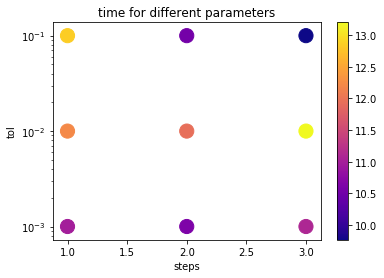

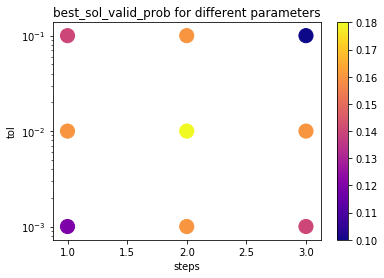

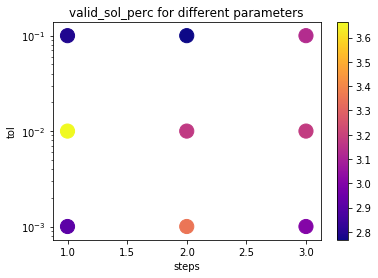

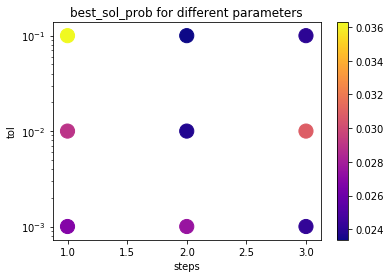

In [8]:
plot_color_map('time')
plot_color_map('best_sol_valid_prob')
plot_color_map('valid_sol_perc')
plot_color_map('best_sol_prob')

Now, based on the results above, you can choose what are the parameters are the best :)

## Fixing starting city

There is another thing we can do to hugely improve how well our algorithm works.
If we know from which city we start (and we do), we can introduce that straight into our cost operators and hence reduce number of qubits we need to use from N^2 to (N-1)^2.

There are three ways you can proceed now:

1. Figure it out by yourself
2. Follow my tips
3. Take a look at my code and reproduce it.

### 1. Figure it out by yourself

Make a copy of `scripts/forest_tsp_solver_naive.py` and solve it by yourself :)

### 2. Follow my tips

1. You need to exclude the first city from all your calculations
2. In `create_weights_cost_operators` you need to add costs of travelling to the first city.
3. Make sure you decode your solution properly! I have created `binary_state_to_points_order_with_fixed_start` method for that.

### 3. Take a look at my code

My approach to this problem is inside `scripts/forest_tsp_solver_improved.py`. Feel free to check it out if you get stucked, but remember - the more time you spend by trying to do it by yourself, the more you will learn out of it :)

## Finally

After you have finished, import your new class and 

                     models will be ineffective
Solution: [0, 1, 2, 3, 3]


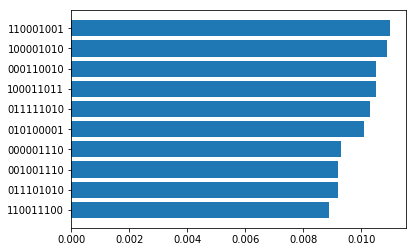

In [16]:
%matplotlib inline
from scripts.forest_tsp_solver_improved import ForestTSPSolverImproved
from scripts import utilities
from scripts import plots

steps = 3
tol = 10e-3

cities = utilities.create_cities(4)
distance_matrix = utilities.get_distance_matrix(cities)
tsp_solver = ForestTSPSolverImproved(distance_matrix, steps=steps, xtol=tol, ftol=tol, use_constraints=True)
solution, _ = tsp_solver.solve_tsp()
print("Solution:", solution)

states_with_probs = []
for state in tsp_solver.sampling_results:
    states_with_probs.append([''.join(map(str,state)), tsp_solver.sampling_results[state]/10000])
states_with_probs = sorted(states_with_probs,key=lambda x: -x[1])
plots.plot_state_histogram(states_with_probs[:10][::-1])